In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import folium 
from folium import plugins
plt.rcParams['figure.figsize'] = 10, 12
import warnings
warnings.filterwarnings('ignore')
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [2]:
df1= pd.read_csv(r'C:/Users/harshit/Desktop/Corona-project/covid_19_data.csv')
df3= pd.read_csv(r'C:/Users/harshit/Desktop/Corona-project/COVID19_open_line_list.csv')
df2= pd.read_csv(r'C:/Users/harshit/Desktop/Corona-project/COVID19_line_list_data.csv')

In [3]:
df= pd.read_excel(r'C:/Users/harshit/Desktop/Corona-project/Covid_India.xlsx')

In [4]:
df.drop(['S. No.'],axis=1,inplace=True)
df['Total cases']=df['Total Confirmed cases (Indian National)']+df['Total Confirmed cases ( Foreign National )']
total_cases=df['Total cases'].sum()
print('The total number of cases till now in India is',total_cases)

The total number of cases till now in India is 729


In [5]:
India_coord = pd.read_excel(r'C:/Users/harshit/Desktop/Corona-project/Indian Coordinates.xlsx')
dbd_India = pd.read_excel(r'C:/Users/harshit/Desktop/Corona-project/per_day_cases.xlsx',parse_dates=True, sheet_name='India')
dbd_Italy = pd.read_excel(r'C:/Users/harshit/Desktop/Corona-project/per_day_cases.xlsx',parse_dates=True, sheet_name="Italy")
dbd_Korea = pd.read_excel(r'C:/Users/harshit/Desktop/Corona-project/per_day_cases.xlsx',parse_dates=True, sheet_name="Korea")
dbd_Wuhan = pd.read_excel(r'C:/Users/harshit/Desktop/Corona-project/per_day_cases.xlsx',parse_dates=True, sheet_name="Wuhan")

# TOTAL CASES IN INDIA

---



In [6]:
df.style.background_gradient(cmap='Blues')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30
5,Himachal Pradesh,4,0,0,1,4
6,Karnataka,20,0,3,2,20
7,Kerala,131,7,11,0,138
8,Madhya Pradesh,23,0,0,1,23
9,Maharashtra,144,3,15,4,147


# TOTAL ACTIVE CASES

In [7]:
df['Total Active'] = df['Total cases'] - (df['Death'] + df['Cured'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across India: 648


,Total Active
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


# VISUALISING THE SPREADS GEOGRAPHICALLY

In [8]:
df_full = pd.merge(India_coord,df,on='Name of State / UT')
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total cases'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=value*0.35, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.2 ).add_to(map)
map

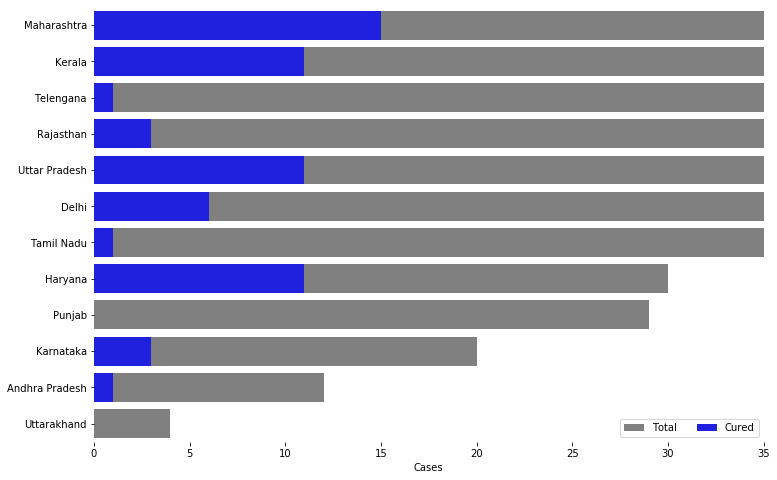

In [9]:
f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['Name of State / UT','Total cases','Cured','Death']]
data.sort_values('Total cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="Name of State / UT", data=data,label="Total", color="grey")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color="blue")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

## Worldwide Coronavirus

In [10]:
#df = pd.read_csv('covid_19_data.csv',parse_dates=['Last Update'])
df1.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
df_confirmed = pd.read_csv(r'C:/Users/harshit/Desktop/Corona-project/time_series_covid_19_confirmed.csv')
df_recovered = pd.read_csv(r'C:/Users/harshit/Desktop/Corona-project/time_series_covid_19_recovered.csv')
df_deaths = pd.read_csv(r'C:/Users/harshit/Desktop/Corona-project/time_series_covid_19_deaths.csv')
df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [11]:
df_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,6,6,6,6,10,10,15,16,19,22
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df.tail()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases,Total Active
21,West Bengal,11,0,0,1,11,10
22,Bihar,7,0,0,1,7,6
23,Mizoram,1,0,0,0,1,1
24,Goa,6,0,0,0,6,6
25,Manipur,1,0,0,0,1,1


In [13]:
df2 = df1.groupby(["Date", "Country", "Province/State"])[['SNo', 'Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()

,Date,Country,Province/State,SNo,Confirmed,Deaths,Recovered
0,01/22/2020,Hong Kong,Hong Kong,13,0.0,0.0,0.0
1,01/22/2020,Macau,Macau,21,1.0,0.0,0.0
2,01/22/2020,Mainland China,Anhui,1,1.0,0.0,0.0
3,01/22/2020,Mainland China,Beijing,2,14.0,0.0,0.0
4,01/22/2020,Mainland China,Chongqing,3,6.0,0.0,0.0


In [14]:
df1.query('Country=="India"').groupby("Last Update")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Last Update,Confirmed,Deaths,Recovered
0,1/30/20 16:00,1.0,0.0,0.0
1,1/31/2020 23:59,1.0,0.0,0.0
2,1/31/2020 8:15,1.0,0.0,0.0
3,2020-02-02T06:03:08,2.0,0.0,0.0
4,2020-02-03T21:43:02,30.0,0.0,0.0
5,2020-02-13T18:53:02,9.0,0.0,0.0
6,2020-02-16T07:43:02,45.0,0.0,45.0
7,2020-03-02T22:33:09,10.0,0.0,6.0
8,2020-03-04T12:33:03,28.0,0.0,3.0
9,2020-03-05T13:53:03,30.0,0.0,3.0


In [15]:
#Overall worldwide Confirmed/ Deaths/ Recovered cases 
df1.groupby('Date').sum().head()

,SNo,Confirmed,Deaths,Recovered
Date,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0


In [16]:
confirmed = df1.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df1.groupby('Date').sum()['Deaths'].reset_index()
recovered = df1.groupby('Date').sum()['Recovered'].reset_index()

In [17]:
df_confirmed = df_confirmed[["Province/State","Lat","Long","Country"]]
df_temp = df1.copy()
df_temp['Country'].replace({'Mainland China': 'China'}, inplace=True)
df_latlong = pd.merge(df_temp, df_confirmed, on=["Country", "Province/State"])

# Forecasting Using fbprophet

In [18]:
### instead try using some advance application algorithm

In [19]:
from fbprophet import Prophet

In [20]:
confirmed = df1.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df1.groupby('Date').sum()['Deaths'].reset_index()
recovered = df1.groupby('Date').sum()['Recovered'].reset_index()

In [21]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [22]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
56,2020-03-18
57,2020-03-19
58,2020-03-20
59,2020-03-21
60,2020-03-22


In [23]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2020-03-18,148703.893313,132137.372448,164121.001193
57,2020-03-19,152585.478705,137689.297914,167495.625921
58,2020-03-20,157365.812683,142197.034127,172140.430947
59,2020-03-21,161049.269158,145278.966653,174887.655101
60,2020-03-22,165066.852886,149746.767265,181880.198317


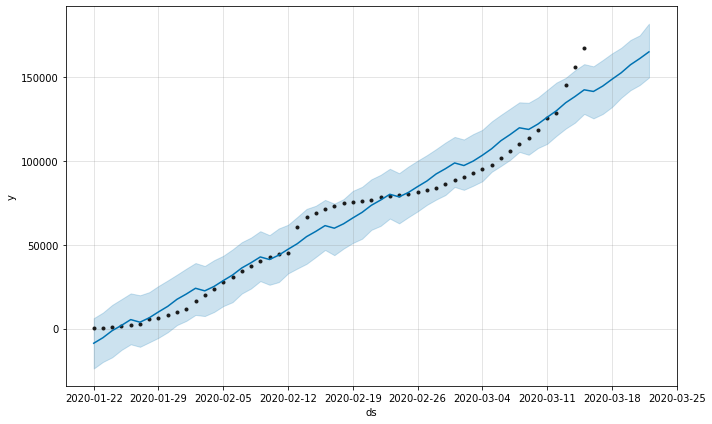

In [24]:
confirmed_forecast_plot = m.plot(forecast)

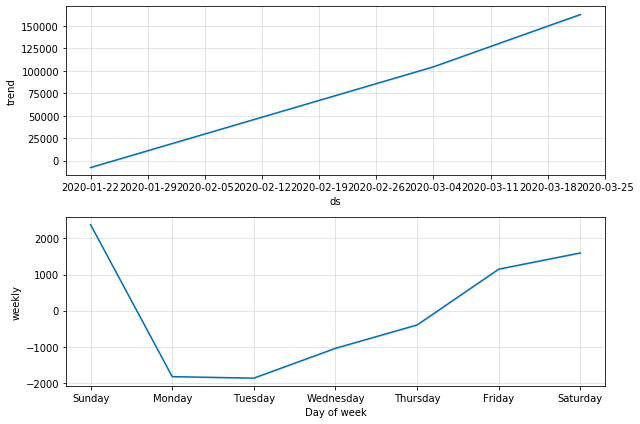

In [25]:
confirmed_forecast_plot =m.plot_components(forecast)

In [26]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [27]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=10)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
59,2020-03-21
60,2020-03-22
61,2020-03-23
62,2020-03-24
63,2020-03-25


In [28]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
59,2020-03-21,6770.710027,6380.518193,7183.203632
60,2020-03-22,7011.342323,6575.448859,7407.129194
61,2020-03-23,7094.159684,6668.131581,7550.265583
62,2020-03-24,7300.721064,6848.237403,7731.803412
63,2020-03-25,7539.129851,7083.352682,7960.654772


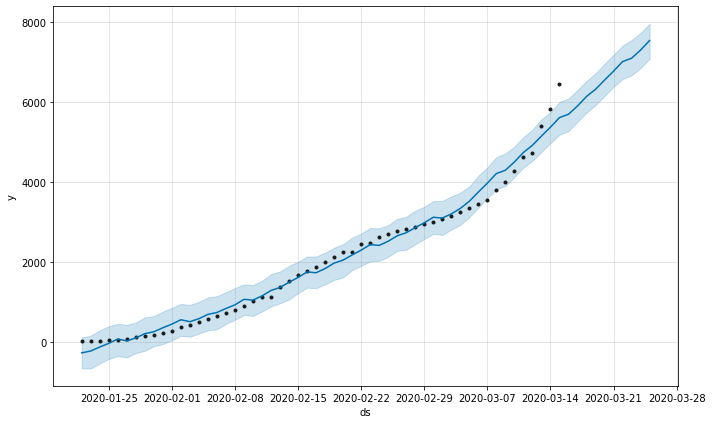

In [29]:
deaths_forecast_plot = m.plot(forecast)

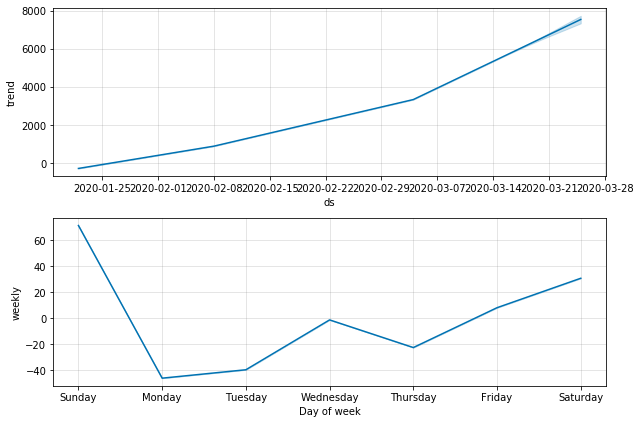

In [30]:
deaths_forecast_plot = m.plot_components(forecast)

In [32]:
"""
#Create independent and Dependent Features
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)"""

'\n#Create independent and Dependent Features\ncolumns = data1.columns.tolist()\n# Filter the columns to remove data we do not want \ncolumns = [c for c in columns if c not in ["Class"]]\n# Store the variable we are predicting \ntarget = "Class"\n# Define a random state \nstate = np.random.RandomState(42)\nX = data1[columns]\nY = data1[target]\nX_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))\n# Print the shapes of X & Y\nprint(X.shape)\nprint(Y.shape)'

In [33]:
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1, random_state=state)
}

NameError: name 'X' is not defined

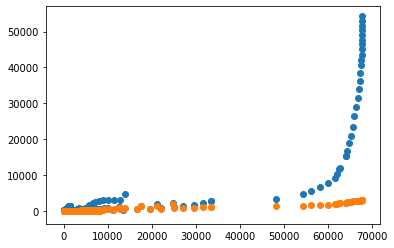

In [61]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

df1= pd.read_csv(r'C:/Users/harshit/Desktop/Corona-project/covid_19_data.csv')
lr=LinearRegression()
lg=LogisticRegression()
x=np.array(df1['Confirmed'])
y=np.array(df1['Recovered']) 
z=np.array(df1['Deaths']) # rate of recovery and deaths.
x=x.reshape(-1,1)
lr.fit(x,y)
y_predict=lr.predict(x)
plt.scatter(x,y)
plt.scatter(x,z)

#plt.plot(x,y_predict,color='red')
plt.show()

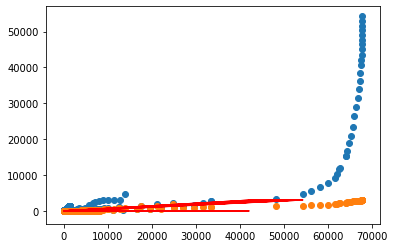

In [62]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
x=np.array(df1['Confirmed'])
y=np.array(df1['Recovered'])
z=np.array(df1['Deaths'])
y=y.reshape(-1,1)
lg.fit(y,z)
z_predict=lg.predict(y)
plt.scatter(x,y)
plt.scatter(x,z)

plt.plot(y,z_predict,color='red')# recovered v/s deaths
plt.show()